## Goal: Classify flowers into species using petal/sepal measurements.
## Algorithm: K-Nearest Neighbors

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# 1. Load dataset
iris = load_iris()
X = iris.data
y = iris.target


In [3]:
# 2. Split train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [5]:
# 3. Train and evaluate KNN for different k
k_values = [1, 3, 5, 7]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.3f}")



K=1, Accuracy=0.933
K=3, Accuracy=0.956
K=5, Accuracy=0.978
K=7, Accuracy=0.956


## Conclusion:

Best KNN = k=5 (97.8%)



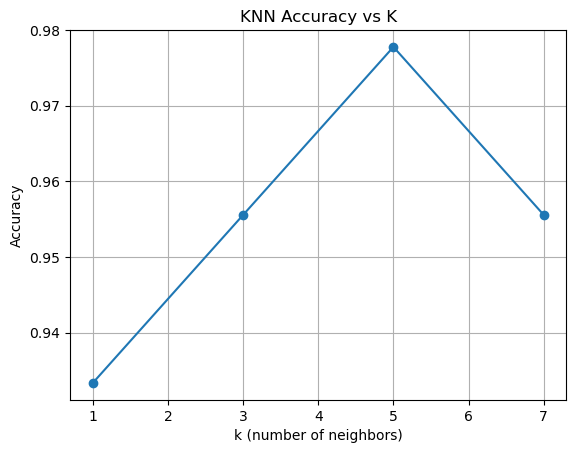

In [6]:
# 4. Plot accuracy vs k
plt.plot(k_values, accuracies, marker="o")
plt.title("KNN Accuracy vs K")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [7]:
# 5. Compare with Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy = {acc_lr:.3f}")

Logistic Regression Accuracy = 0.933


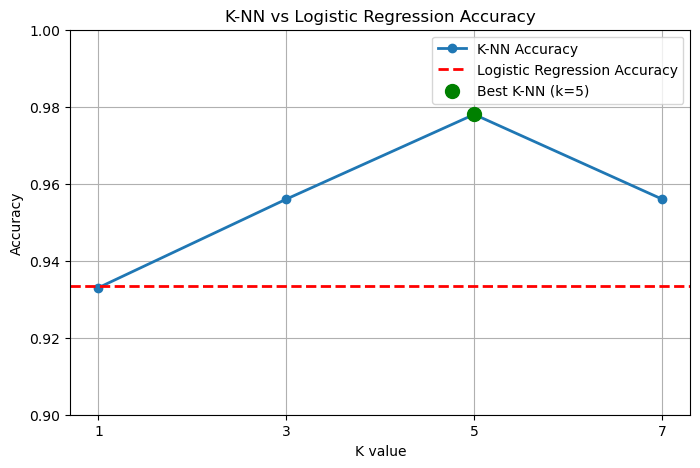

In [12]:
# K-NN results
k_values = [1, 3, 5, 7]
knn_accuracies = [0.933, 0.956, 0.978, 0.956]

# Logistic Regression accuracy
log_reg_acc = acc_lr  

# Best K-NN
best_k = k_values[knn_accuracies.index(max(knn_accuracies))]
best_knn_acc = max(knn_accuracies)

# Plotting
plt.figure(figsize=(8,5))
plt.plot(k_values, knn_accuracies, marker='o', label='K-NN Accuracy', linewidth=2)
plt.axhline(y=log_reg_acc, color='r', linestyle='--', label='Logistic Regression Accuracy', linewidth=2)
plt.scatter(best_k, best_knn_acc, color='green', s=100, zorder=5, label=f'Best K-NN (k={best_k})')

plt.title("K-NN vs Logistic Regression Accuracy")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.ylim(0.9, 1)
plt.grid(True)
plt.legend()
plt.show()


## K-NN’s accuracy varies with k, reaching its peak at k = 5
## Logistic Regression shows stable performance, slightly below the best K-NN accuracy
## Overall, K-NN slightly outperforms Logistic Regression on this dataset